Shape of the dataset: (891, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Data Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.

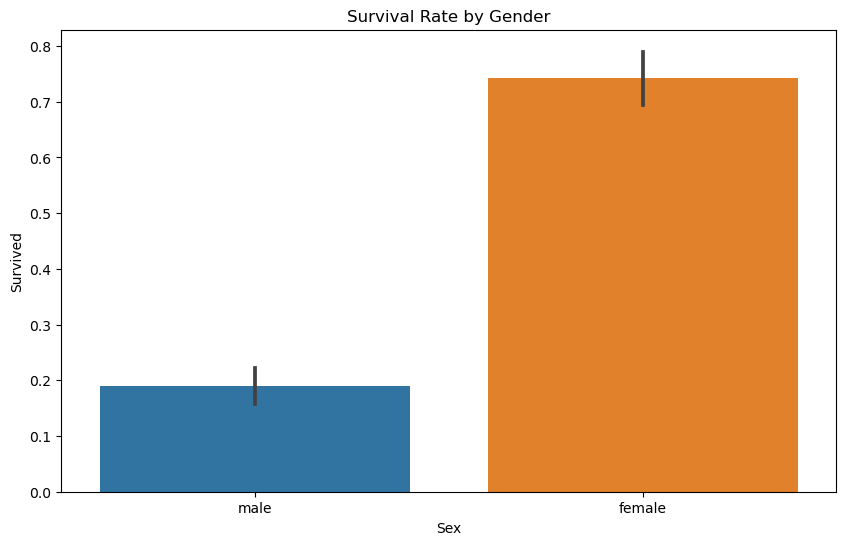

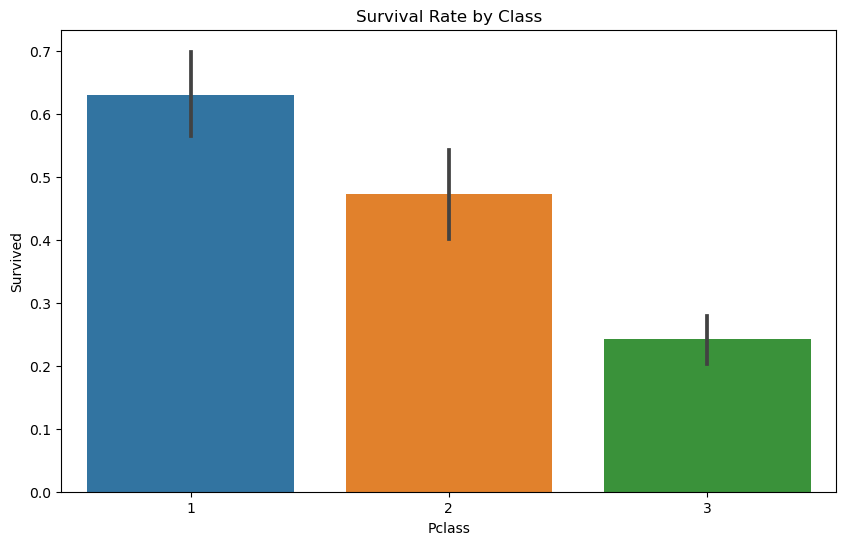

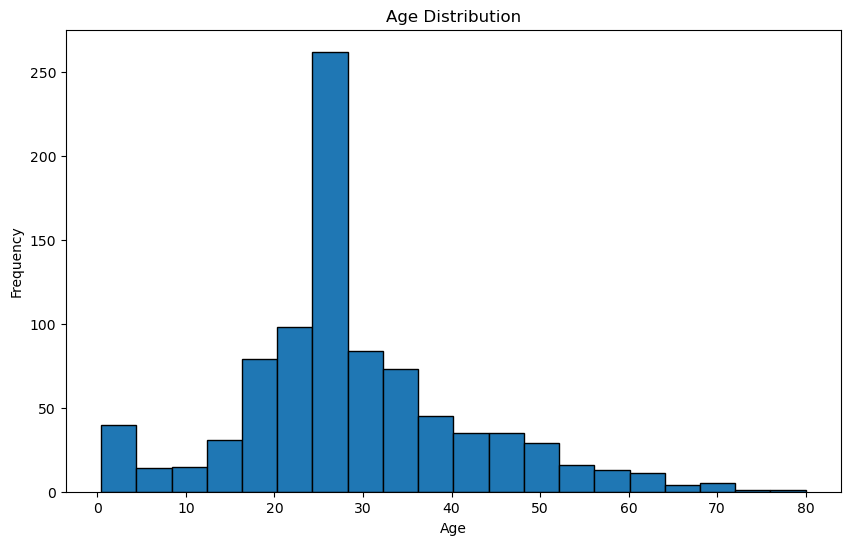

C:\Users\rajvi\AppData\Local\Temp\ipykernel_12108\3015222961.py:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 1]['Age'], label='Survived', shade=True)
C:\Users\rajvi\AppData\Local\Temp\ipykernel_12108\3015222961.py:55: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 0]['Age'], label='Did not survive', shade=True)


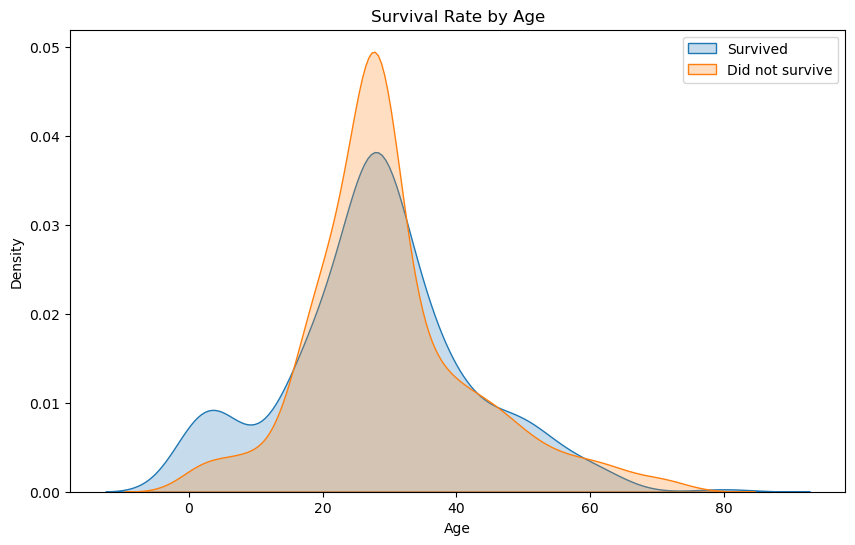

C:\Users\rajvi\AppData\Local\Temp\ipykernel_12108\3015222961.py:64: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


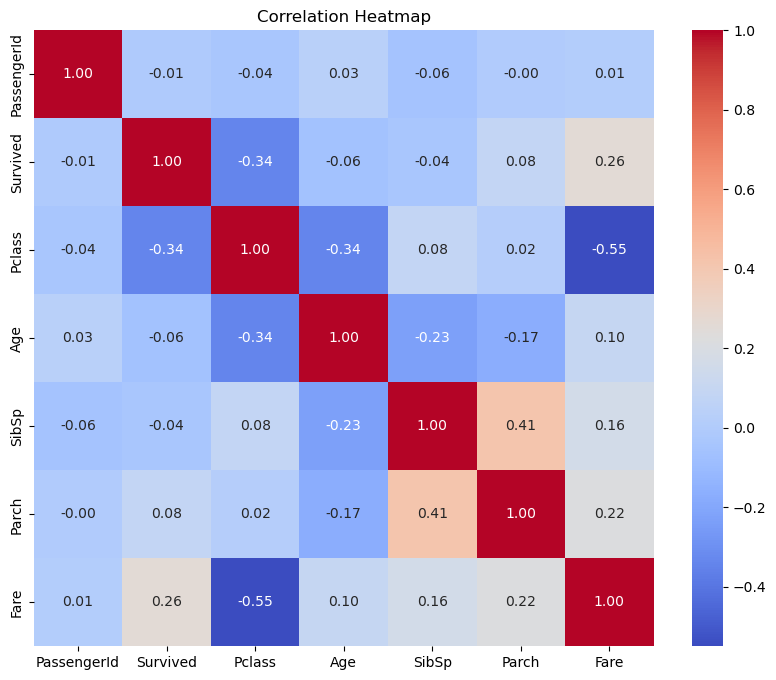

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the zip file
zip_file_path = 'titanic (1).zip'  # Path to your zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./titanic_data')

# Load the dataset
data_file_path = './titanic_data/train.csv'  # Adjust path if needed
data = pd.read_csv(data_file_path)

# Inspect the data
print("Shape of the dataset:", data.shape)
print("\nData Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)  # Drop the 'Cabin' column due to too many missing values

# Verify that there are no more missing values
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Exploratory Data Analysis
# Survival Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival Rate by Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival Rate by Age
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(data[data['Survived'] == 0]['Age'], label='Did not survive', shade=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
